In [1]:
import numpy as np
import pandas as pd
from cmcrameri import cm
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

current_year = datetime.now().year

col_names = [
    'Year', 'Month', 'Monthly Anomaly', 'Monthly Unc.', 'Annual Anomaly', 'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.',
    'Ten-year Anomaly', 'Ten-year Unc.', 'Twenty-year Anomaly', 'Twenty-year Unc.'
    ]

def read_df(file_path, split=True):
    df = pd.read_csv(file_path, delim_whitespace=True, comment='%', names=col_names, header=None)
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
    years = df['Year'].unique()
    n_years = len(years)

    if split:
        split_ind = len(df) // 2
        df_air = df.iloc[:split_ind]
        df_water = df.iloc[split_ind:]
        return (df_air, df_water, years, n_years)
    else:
        return (df, years, n_years)

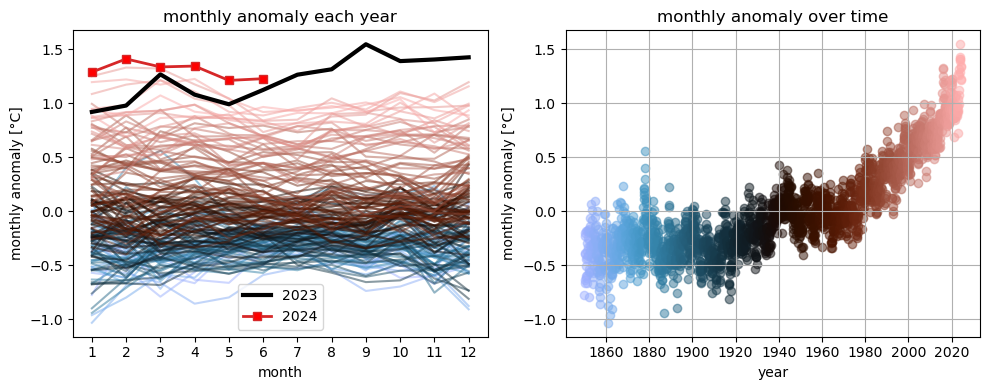

In [2]:
file_path = '/Users/petar/Documents/Miscellaneous/Global Warming/Land_and_Ocean_complete.txt'
(df_air, df_water, years, n_years) = read_df(file_path)

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

cmap = cm.berlin

colors_annual = cmap(np.linspace(0, 1, n_years))
for y, year in enumerate(years):
    yearly_data = df_air[df_air['Year'] == year]
    if year == current_year:
        # continue
        ax[0].plot(yearly_data['Month'], yearly_data['Monthly Anomaly'], c='tab:Red', linewidth=2, label='2024', marker='s', markerfacecolor='r')
    elif year == current_year - 1:
        ax[0].plot(yearly_data['Month'], yearly_data['Monthly Anomaly'], c='k', linewidth=3, label='2023')
    else:
        ax[0].plot(yearly_data['Month'], yearly_data['Monthly Anomaly'], c=colors_annual[y], alpha=0.5)
ax[0].set_title('monthly anomaly each year')
ax[0].set_xlabel('month')
ax[0].set_ylabel('monthly anomaly [°C]')
ax[0].set_xticks(range(1, 13))
ax[0].legend()

colors_all = cmap(np.linspace(0, 1, len(df_air)))
ax[1].grid()
for i, row in df_air.iterrows():
    ax[1].scatter(row['Date'], row['Monthly Anomaly'], color=colors_all[i], edgecolor=colors_all[i], alpha=0.5)
ax[1].set_title('monthly anomaly over time')
ax[1].set_xlabel('year')
ax[1].set_ylabel('monthly anomaly [°C]')

fig.tight_layout()

fig.savefig('global_monthly_anomaly.png')

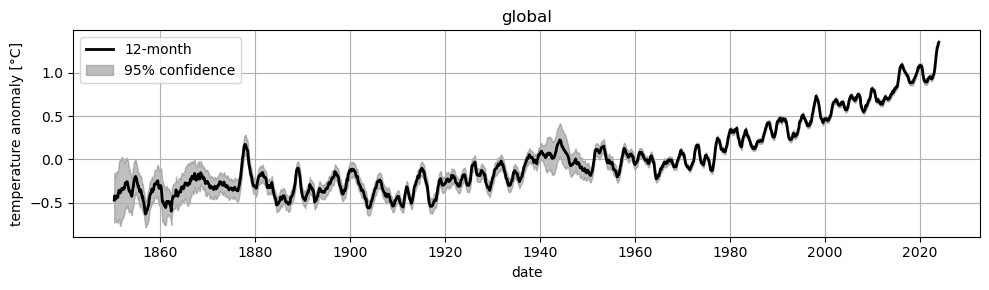

In [3]:
fig, ax = plt.subplots(figsize=(10, 3))

file_path = '/Users/petar/Documents/Miscellaneous/Global Warming/Land_and_Ocean_complete.txt'
(df_air, _, _, _) = read_df(file_path)

ax.plot(df_air['Date'], df_air['Annual Anomaly'], c='k', linewidth=2, label='12-month')
ax.fill_between(df_air['Date'], df_air['Annual Anomaly'] - df_air['Annual Unc.'], df_air['Annual Anomaly'] + df_air['Annual Unc.'], color='gray', alpha=0.5, label='95% confidence')
ax.set_xlabel('date')
ax.set_ylabel('temperature anomaly [°C]')
ax.set_title('global')
ax.grid()
ax.legend()

fig.tight_layout()

fig.savefig('global_annual_anomaly.png')

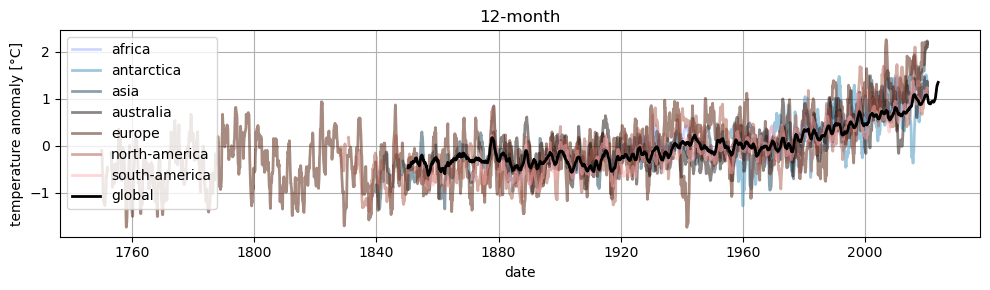

In [4]:
fig, ax = plt.subplots(figsize=(10, 3))

cont_strs = ['africa', 'antarctica', 'asia', 'australia', 'europe', 'north-america', 'south-america']
cmap = cm.berlin
colors_cont = cmap(np.linspace(0, 1, len(cont_strs)))
for c, cont_str in enumerate(cont_strs):
    file_path = '/Users/petar/Documents/Miscellaneous/Global Warming/{}-TAVG-Trend.txt'.format(cont_str)
    (df, years, n_years) = read_df(file_path, split=False)
    ax.plot(df['Date'], df['Annual Anomaly'], linewidth=2, label=cont_str, c=colors_cont[c], alpha=0.5)

file_path_global = '/Users/petar/Documents/Miscellaneous/Global Warming/Land_and_Ocean_complete.txt'
(df_air_global, _, _, _) = read_df(file_path_global)
ax.plot(df_air_global['Date'], df_air_global['Annual Anomaly'], c='k', linewidth=2, label='global')

ax.set_xlabel('date')
ax.set_ylabel('temperature anomaly [°C]')
ax.set_title('12-month')
ax.grid()
ax.legend()

fig.tight_layout()

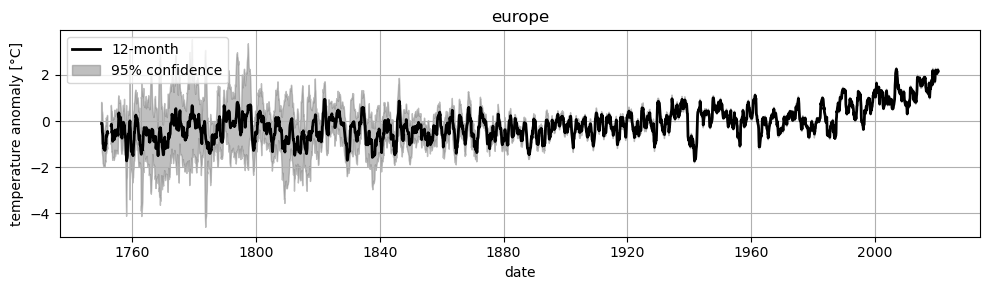

In [5]:
fig, ax = plt.subplots(figsize=(10, 3))

file_path = '/Users/petar/Documents/Miscellaneous/Global Warming/europe-TAVG-Trend.txt'
(df_air, _, _) = read_df(file_path, split=False)

ax.plot(df_air['Date'], df_air['Annual Anomaly'], c='k', linewidth=2, label='12-month')
ax.fill_between(df_air['Date'], df_air['Annual Anomaly'] - df_air['Annual Unc.'], df_air['Annual Anomaly'] + df_air['Annual Unc.'], color='gray', alpha=0.5, label='95% confidence')
ax.set_xlabel('date')
ax.set_ylabel('temperature anomaly [°C]')
ax.set_title('europe')
ax.grid()
ax.legend()

fig.tight_layout()